# Decision Tree using Sklearn Library

In [2]:
import pandas as pd # used for data pre processing
import seaborn as sb #To take the sample dataset
from sklearn import tree #Import Decision tree model
import matplotlib.pyplot as plt # For data visualization
from sklearn.model_selection import train_test_split # For Splitting the dataset for model training & test

### Data Preparation

In [3]:
titanic_df = sb.load_dataset('titanic')
dataset = titanic_df[['survived', 'pclass', 'sex', 'age','fare', 'alone']]
dataset

,survived,pclass,sex,age,fare,alone
0,0,3,male,22.0,7.2500,False
1,1,1,female,38.0,71.2833,False
2,1,3,female,26.0,7.9250,True
3,1,1,female,35.0,53.1000,False
4,0,3,male,35.0,8.0500,True
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,True
887,1,1,female,19.0,30.0000,True
888,0,3,female,NaN,23.4500,False
889,1,1,male,26.0,30.0000,True


In [4]:
dataset_copy = dataset.copy()
dataset_copy['sex'] = dataset_copy['sex'].replace(['female', 'male'], [0, 1])
dataset_copy['alone'] = dataset_copy['alone'].replace([False,True],[0,1])
dataset_copy.ffill(inplace=True)
dataset_copy

,survived,pclass,sex,age,fare,alone
0,0,3,1,22.0,7.2500,0
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,1
3,1,1,0,35.0,53.1000,0
4,0,3,1,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1
887,1,1,0,19.0,30.0000,1
888,0,3,0,19.0,23.4500,0
889,1,1,1,26.0,30.0000,1


### Splitting Dataset for Training and  Testing

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
  dataset_copy[['pclass','sex','age','fare','alone']],dataset_copy[['survived']] ,test_size=0.25, shuffle=True)

### Create Model

In [19]:
#dtree_model = tree.DecisionTreeClassifier()
#dtree_model = tree.DecisionTreeClassifier(max_depth=3) #pruning
dtree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3) # To use Entropy

### Train the Model

In [20]:
dtree_model = dtree_model.fit(X_train, Y_train )

### Prediction

In [21]:
X_test

,pclass,sex,age,fare,alone
526,2,0,50.0,10.5000,1
418,2,1,30.0,13.0000,1
702,3,0,18.0,14.4542,0
425,3,1,18.0,7.2500,1
291,1,0,19.0,91.0792,0
...,...,...,...,...,...
756,3,1,28.0,7.7958,1
265,2,1,36.0,10.5000,1
594,2,1,37.0,26.0000,0
461,3,1,34.0,8.0500,1


In [22]:

dtree_model.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

### Check Accuracy

In [23]:
dtree_model.score(X_test, Y_test)

0.8430493273542601

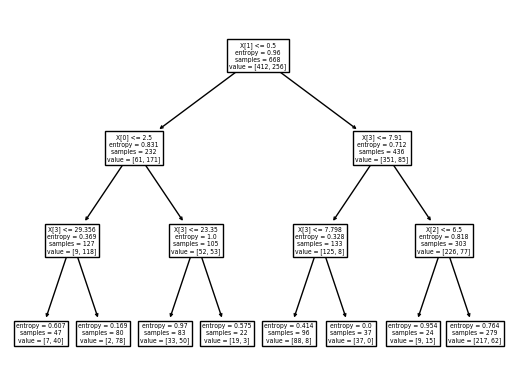

In [24]:
tree.plot_tree(dtree_model)
plt.show()